<a href="https://colab.research.google.com/github/LLegler89/Portfolio/blob/main/Disease_prediction_ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Levi Legler

Date: 4/21/24

Data Source: Kaggle

Data Author: KAUSHIL268

URL: https://www.kaggle.com/datasets/kaushil268/disease-prediction-using-machine-learning

In [ ]:
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 31.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasClassifier

# Define the model with dropout_rate as an argument
def create_deep_model(dropout_rate=[0.3]):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(input_shape,)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Data import and cleaning
df = pd.read_csv('/content/Training.csv')
df = df.drop('Unnamed: 133', axis=1)
df = df.dropna()
print(df.describe())
x_train = df.drop(['prognosis'], axis=1)
y_train = df['prognosis']

# Data scaling is unncessary as these are all binary variables.

# Define input shape and number of classes
input_shape = x_train.shape[1]
num_classes = len(np.unique(y_train))

# Create KerasClassifier
model = KerasClassifier(build_fn=create_deep_model, verbose=0, dropout_rate=0.3)

# Define parameter grid
param_grid = {
    'dropout_rate': [0.3, 0.5, 0.7]  # Different dropout rates to try
}

# Create KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, n_jobs=-1)

# Perform grid search
grid_result = grid_search.fit(x_train, y_train)

# Print results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


           itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368667     0.346007      0.207593     0.207593 

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best: 0.998577 using {'dropout_rate': 0.3}
0.998577 (0.001521) with: {'dropout_rate': 0.3}
0.959756 (0.020402) with: {'dropout_rate': 0.5}
0.825813 (0.063944) with: {'dropout_rate': 0.7}


In [ ]:
# Load and preprocess the test dataset
df_test = pd.read_csv('/content/Testing.csv')
print(df_test.describe())
df_test = df_test.dropna()
x_test = df_test.drop(['prognosis'], axis=1)
y_test = df_test['prognosis']

# Make predictions on the test data
y_pred = grid_result.predict(x_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Test Accuracy:", accuracy)
print("Classification Report:\n", report)

         itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  42.000000  42.000000             42.000000            42.000000   
mean    0.166667   0.190476              0.023810             0.047619   
std     0.377195   0.397437              0.154303             0.215540   
min     0.000000   0.000000              0.000000             0.000000   
25%     0.000000   0.000000              0.000000             0.000000   
50%     0.000000   0.000000              0.000000             0.000000   
75%     0.000000   0.000000              0.000000             0.000000   
max     1.000000   1.000000              1.000000             1.000000   

       shivering     chills  joint_pain  stomach_pain    acidity  \
count  42.000000  42.000000   42.000000     42.000000  42.000000   
mean    0.023810   0.166667    0.142857      0.047619   0.047619   
std     0.154303   0.377195    0.354169      0.215540   0.215540   
min     0.000000   0.000000    0.000000      0.000000   0.000

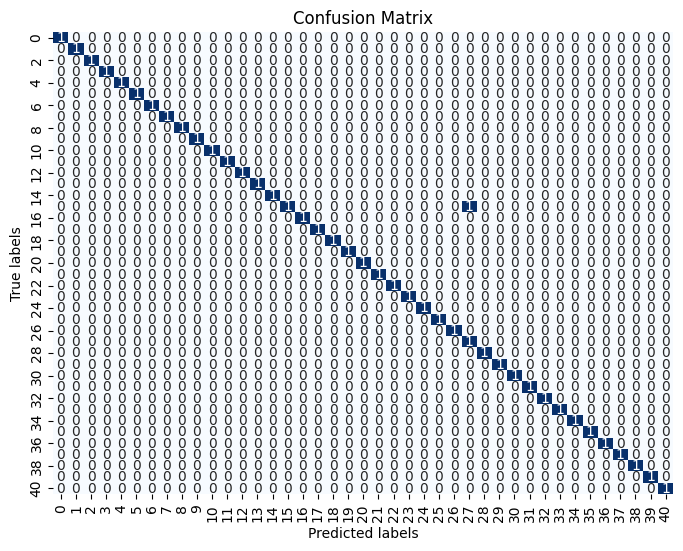

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d" cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

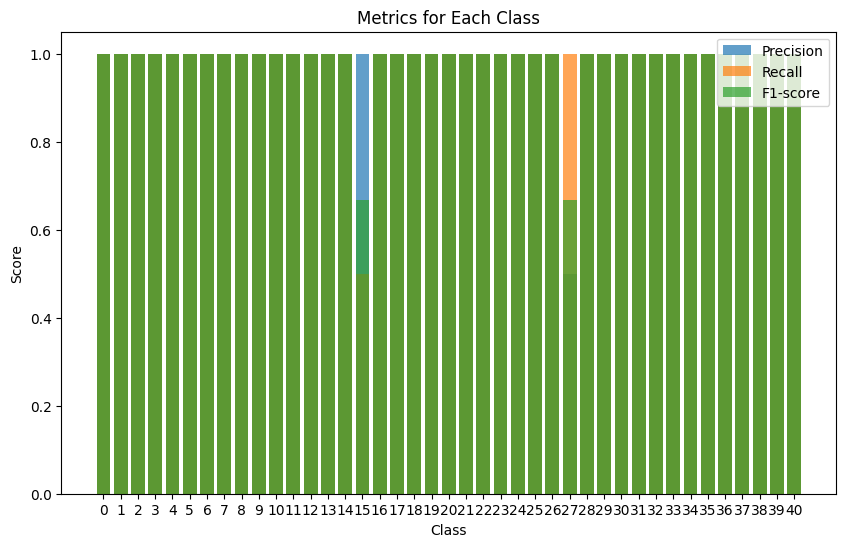

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Calculate precision, recall, and F1-score for each class
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred)

# Plot metrics for each class
plt.figure(figsize=(10, 6))
plt.bar(range(num_classes), precision, label='Precision', alpha=0.7)
plt.bar(range(num_classes), recall, label='Recall', alpha=0.7)
plt.bar(range(num_classes), fscore, label='F1-score', alpha=0.7)
plt.xticks(range(num_classes))
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Metrics for Each Class')
plt.legend()
plt.show()

For this model we utilized a keras classifier from the tensorflow library. This model was trained on a dataset containing binary classifiers for symptoms that may be observed in a clinic and used to train the model to predict the overall diagnosis. Our training strategy involved a grid search to determine the optimal dropout rate, as well as a k-folds cross-validation to curve any overtraining that may have occurred. Accuracy testing was conducted using a seperate dataset. We observe from our model a 98% overall accuracy. Based on weighted averages we also observe 99% precision, with 98% recall and 98% F1 score. Our model has high levels of success in predicting the diagnosis of the patient with only 2 classes facing significant difficulties in classification. Those classes being fungal infections and Impetigo. This makes logical sense given the overlap of symptoms that occur in these conditions. We will typically observe dry red flaky skin in either of these conditions as well as fever without respiratory symptoms. I would conject that upon further investigation we would find sufficient overlap in the symptom profiles of these conditions to explain the drop in the accuracy of prediction that we observe.